<a href="https://colab.research.google.com/github/tracyhua2/DS3001/blob/main/Labs/Lab_3_Decision_Trees_and_Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Name:** Tracy Hua

## **Computing ID:** njn4gb

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

!pip install lime
from lime import lime_tabular
from sklearn.inspection import permutation_importance

# Below is a new package needed for this lab
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=764ef466f5a3310fd6c90099efcecf9abfa8023ad7553e62c1ff180c6d2fc1cf
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


# Lab 3: Decision Trees and Random Forests (100 Points)

The goal of this lab is to optimize Decision Tree and Random Forest models using the provided dataset on census level data. Your goal is to build a Random Forest Classifier to be able to predict income levels above or below 50k.

The guidance this week is less prescriptive in terms of steps, so use the skills you have gained over the semester to build and evaluate your models. You will be graded on your model building, interpretation of the results and explanation of model selection. As always, you are welcome to rely on your classmates but submit your own code. Lastly, there are likely several correct approaches involving a variety of different conclusions, just make sure your conclusions are supported by your approach.


The dataset should be familiar as it's the census data, on 48,000+ individuals with a variety of variables and a target variable for above or below 50k in salary.

![](https://www.coopercenter.org/sites/default/files/styles/wide/public/wordpress_import/Figure1CesnsuBlog2-1024x512_0.png?itok=DwYqkfFm)

Look through the data dictionary at its source link: https://archive.ics.uci.edu/ml/datasets/Adult

# **Part 1: Data Preparation and EDA (15 points)**

In a text cell, answer the following exploratory questions and support your observations with any code, if needed.

## **Question 1 (2 points):**
## Read in the features (X) as a Pandas DataFrame. Show the first 5 rows of the features. How many rows do you have?



In [3]:
# Fetch dataset
adult = fetch_ucirepo(id=2)

X = adult.data.features
y = adult.data.targets

In [4]:
X.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [5]:
len(X)

48842

**There is a total of 48842 rows.**

## **Question 2 (2 points):**
## Are there any potential issues in the data or target that need to be corrected? Why are they issues? What specific method would you use to correct them and why?

## Consider using code and reading the data description (https://archive.ics.uci.edu/dataset/2/adult) to explore:

*   Assumptions and ranges of collected data
*   Missing values (impute? drop?)
*   Numerical data types represented as strings
*   Encoding categorical data appropriately
*   Normalization
*   Standardization

## You will not need to consider feature imbalances or sampling in part 1 or 2 of the lab.

In [6]:
print(X.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object


In [7]:
X.isna().sum()

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

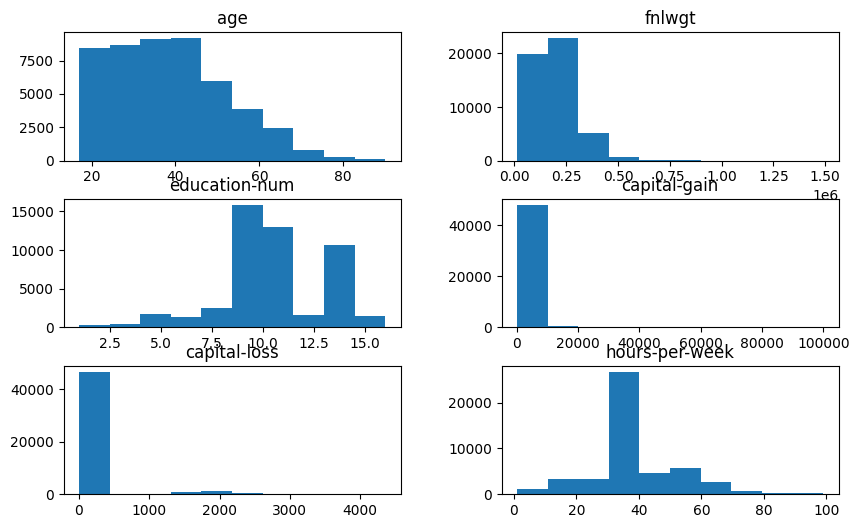

In [8]:
X.hist(figsize=(10,6),bins=10, grid=False)

**Potential Issues:** Potential issues I've identified are:
- Missing values marked as NaN or '?'
- Non-numerical columns are stored as 'object' and non-numerical
- Some columns do not have normal distribution (e.g., age, fnlwgt, education-num, capital-gain, capital-loss, and hours-per-week)

## **Question 3 (6 points):**
## Preprocess the data according to the issues and correction methods you've identified. Save the new features and target variable (if necessary) as X_clean and y_clean.

In [9]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [10]:
from sklearn.preprocessing import LabelEncoder, PowerTransformer

# Convert 'object' data types to 'string'
X = X.astype({col: 'string' for col in X.select_dtypes(include=['object']).columns})

# Replace '?' with NaN
X.replace('?', np.nan, inplace=True)

# Impute columns with NAs (workclass, occupation, native-country) with mode value
NA_cols = ['workclass', 'occupation', 'native-country']
for col in NA_cols:
    X[col] = X[col].fillna(X[col].mode()[0])

# Apply transformation to normalize skewed numerical columns
skewed_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
pt = PowerTransformer(method='yeo-johnson')
X[skewed_cols] = pt.fit_transform(X[skewed_cols])

# Encode categorical variables using One-Hot Encoder
cat_cols = X.select_dtypes(include=['string']).columns
label_encoder = LabelEncoder()
for col in cat_cols:
    X[col] = label_encoder.fit_transform(X[col])

print(X.head())

        age  workclass    fnlwgt  education  education-num  marital-status  \
0  0.171679          6 -1.178508          9       1.167267               4   
1  0.885016          5 -1.087959          9       1.167267               2   
2  0.098874          3  0.400425         11      -0.464277               0   
3  1.056783          3  0.564004          1      -1.200333               2   
4 -0.732184          3  1.340392          9       1.167267               2   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0           0             1     4    1      3.332314     -0.221387   
1           3             0     4    1     -0.300088     -0.221387   
2           5             1     4    1     -0.300088     -0.221387   
3           5             0     2    1     -0.300088     -0.221387   
4           9             5     2    0     -0.300088     -0.221387   

   hours-per-week  native-country  
0       -0.033553              38  
1       -2.215321              38  
2 

## **Question 4 (5 points):**
## Create 2 versions of y_clean to create a new target response of whether income is above or below $50,000 for classification.

1.   **y_clean_binary:** Recode y_clean to be 1 if the target is over or equal to
2.   **y_clean_string:** Recode y_clean to be "Above or Equal" if the target is over or equal to 50,000 and "Below" if under.



In [11]:
y.value_counts()

,count
income,
<=50K,24720
<=50K.,12435
>50K,7841
>50K.,3846


In [12]:
y['income'] = y['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})

y_clean_binary = y['income'].apply(lambda x: 1 if x == '>50K' else 0)
y_clean_string = y['income'].apply(lambda x: 'Above or Equal' if x == '>50K' else 'Below')

<ipython-input-12-e858b2653ffd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['income'] = y['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})


# **Part 2: Decision Tree Pruning, Tuning and Evaluation (30 Points)**

## **Question 1 (5 points):**
## Create a function to take in a feature variable (X) and (y). In this function, create a train test split with a random seed of 3001.

## Use a vanilla decision tree model to fit the model on the train set and predict on the test set. Print the precision, recall, and accuracy of the model after prediction.

## Test that your function runs on both y_clean_binary and y_clean_string. For any of the following questions, you may use whichever y_clean variable you'd like.


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y_clean_binary, test_size=0.2, random_state=3001)

In [14]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# Vanilla Decision Tree
tree = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=5)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
print(f'Precision: {precision}, Recall: {recall}, Accuracy: {accuracy}')

Precision: 0.8115701401246369, Recall: 0.7260269610413994, Accuracy: 0.8448152318558706


## **Question 2 (5 points):**
## Adjust your function to include some plotting features. After your prediction code, plot:

1.   A visualization of the resulting decision tree
2.   A confusion matrix of the results

## Your tree might be overwhelming or very large! If it is too large to be interpreted, constrain the max_depth parameter manually to 5 or less.

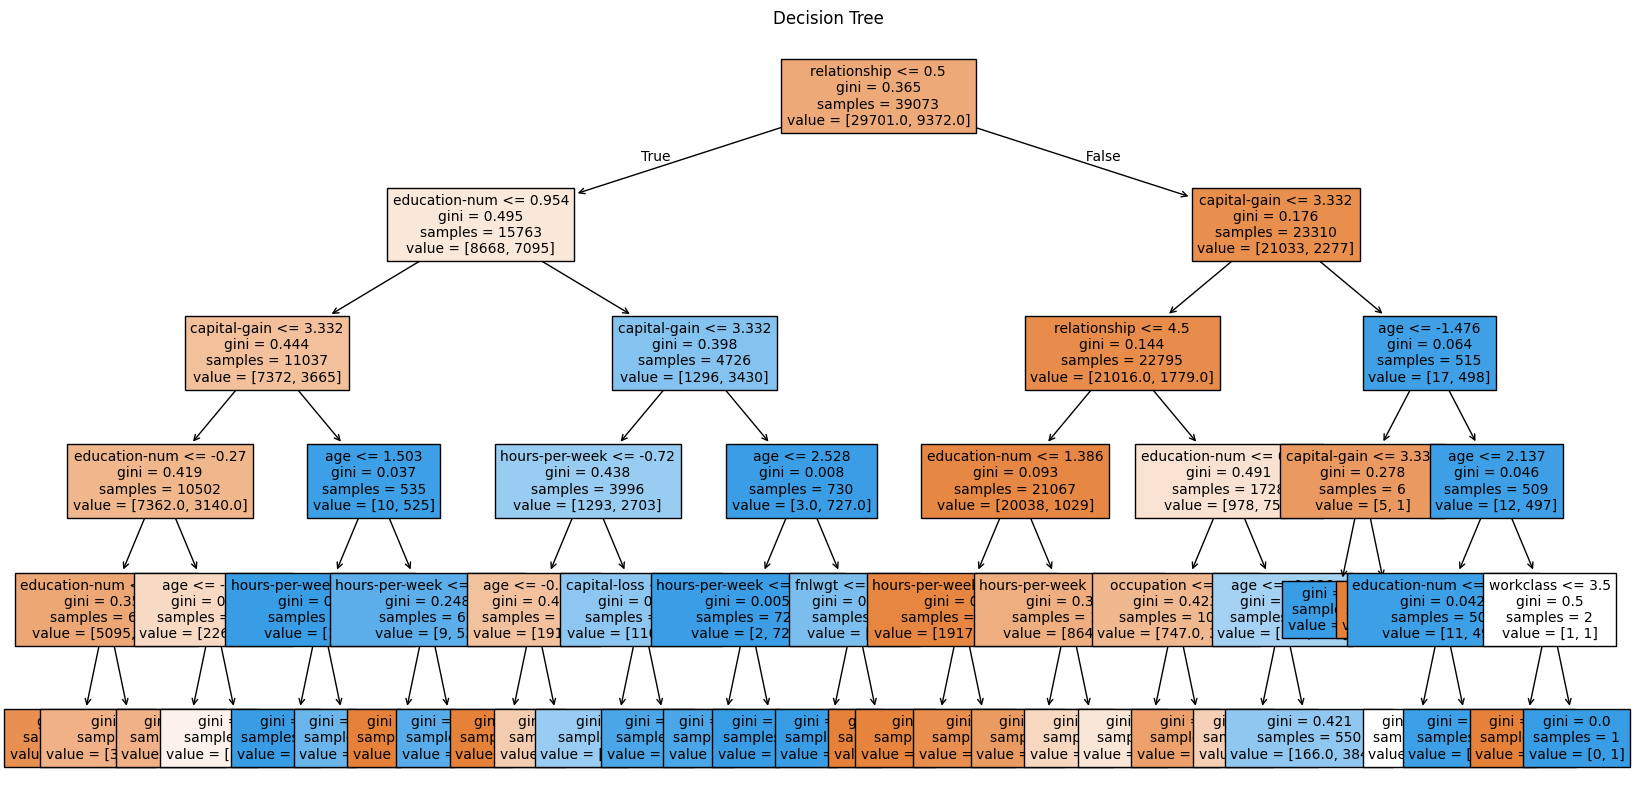

In [15]:
# Tree plot
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=X.columns, fontsize=10)
plt.title('Decision Tree')
plt.show()

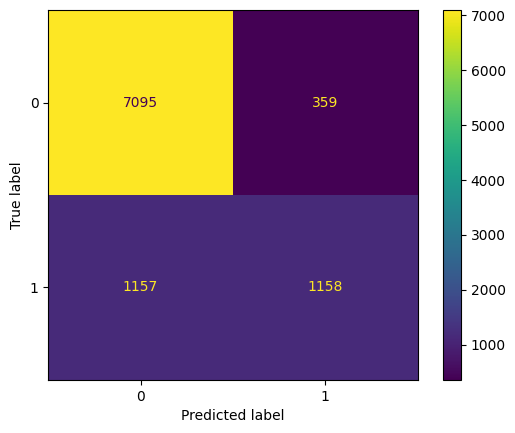

In [16]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred ,labels=tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels = tree.classes_)
disp.plot()
plt.show()

## **Question 3 (5 points):**
## Create a sorted list of feature importances and comment on the top features.Are there a few that seem to be more important than the others?

## Plot your feature importances in a horizontal or vertical bar chart from most to least important. Label each bar with its feature importance rounded to the nearest integer (ie: 30%).

In [17]:
importances = tree.feature_importances_
feature_importances = pd.DataFrame({'Feature':X_train.columns,'Importance':importances*100})
feature_importances = feature_importances.sort_values(by='Importance',ascending=False)
print(feature_importances)

           Feature  Importance
7     relationship   46.879394
4    education-num   24.450555
10    capital-gain   23.317916
12  hours-per-week    2.374263
0              age    1.654137
11    capital-loss    0.783075
6       occupation    0.498949
2           fnlwgt    0.025026
1        workclass    0.016684
3        education    0.000000
5   marital-status    0.000000
8             race    0.000000
9              sex    0.000000
13  native-country    0.000000


Relationship is significantly more important than any of the other features, where it is almost twice as important as the second most important feature (education-num). It seems that most of the features are not important and only 7 of them even have any affect.

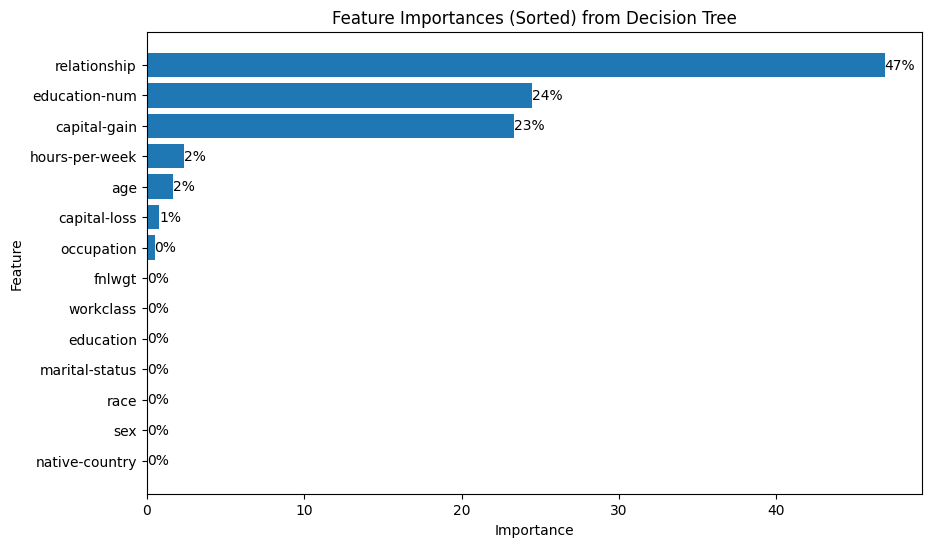

In [18]:
# Feature Importance Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Sorted) from Decision Tree')
plt.gca().invert_yaxis()
for index, value in enumerate(feature_importances['Importance']):
    plt.text(value, index, f'{value:.0f}%', va='center')
plt.show()

## **Question 4 (5 points):**
## Write at least 5 sentences interpreting the results of your decision tree, confusion matrix, and feature importance visualizations.

## Is there any aspect of your results that you are uncertain or unsure of?

**My results show that most of the features in the model are actually irrelevant to the prediction and is 82% dependent on just 'relationship' and 'education-num' for the prediction. However, the model did achieve high precision, recall, and accuracy. The model achieved a 77.33% precision, indicating that of all the positive predictions made by the model, approximately 77.33% were correct. The recall was 71.96%, meaning the model correctly identified 71.96% of all actual positive cases. The overall accuracy of 82.91% shows that the model was able to correctly identify a majority of instances across both classes. The confusion matrix indicates a relatively high false positive and false negative rate. The main uncertainty behavior of the model is that it seems that the decision tree overly relied on a few features, like relationship and education-num, which might not capture the complexity of the other features. There also seems to be an imbalance of classes, with far more negative than positive samples, which could be influencing precision and recall.**

## **Question 5 (5 points):**
## Finally, we will create a new function to tune your decision tree to get more accurate and efficient results. Update your function to take in several new parameters with these default values:
* criterion_val ='gini'
* splitter_val ='best'
* max_depth_val = None
* min_samples_split_val = 2
* min_samples_leaf_val =1

## Pass your own variable into the decision tree by specifying what sklearn parameter you are trying to tune. This will simply be the parameter without the "_val" suffix.

## **For example, if your vanilla decision tree variable is called clf, you would adjust it like this:**
`clf = DecisionTreeClassifier(criterion=criterion_val, splitter=splitter_val, ...)`

In [19]:
def tune_decision_tree(X_train, y_train, X_test, y_test,
                       criterion_val='gini', splitter_val='best',
                       max_depth_val=None, min_samples_split_val=2,
                       min_samples_leaf_val=1):
    # Create and tune the Decision Tree Classifier
    tree = DecisionTreeClassifier(
        criterion=criterion_val,
        splitter=splitter_val,
        max_depth=max_depth_val,
        min_samples_split=min_samples_split_val,
        min_samples_leaf=min_samples_leaf_val,
        random_state=42
    )
    return tree

## **Question 6 (5 points):**

## Call your new function with either clean y variable at least 3 times. Each time, vary the values for all the parameters and examine its effects on your tree, confusion matrix, and metrics.

## You will likely want to look at documentation to see accepted values:  
###https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

## Why did you pick the values you did? What combination had the best effect on accuracy? Were you surprised by any of the results?

In [20]:
# 1.
treev1 = tune_decision_tree(X_train, y_train, X_test, y_test,
                          criterion_val='gini', splitter_val='best',
                          max_depth_val=None, min_samples_split_val=2,
                          min_samples_leaf_val=1)
treev1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

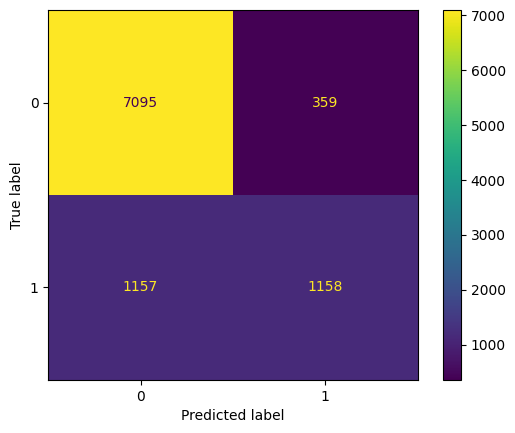

In [21]:
cm = confusion_matrix(y_test, y_pred ,labels=treev1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels = treev1.classes_)
disp.plot()
plt.show()

In [22]:
y_pred = treev1.predict(X_test)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
print(f'Precision: {precision}, Recall: {recall}, Accuracy: {accuracy}')

Precision: 0.7286284196588986, Recall: 0.7321331524494944, Accuracy: 0.8034599242501791


The first trial uses the default gini criteria, no max depth, and standard splitting and leaf values. This model is more likely to overfit if the tree grows too in depth because it isn't limited in depth.

In [23]:
# 2.
treev2 = tune_decision_tree(X_train, y_train, X_test, y_test,
                          criterion_val='entropy', splitter_val='best',
                          max_depth_val=5, min_samples_split_val=10,
                          min_samples_leaf_val=2)
treev2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=10, random_state=42)

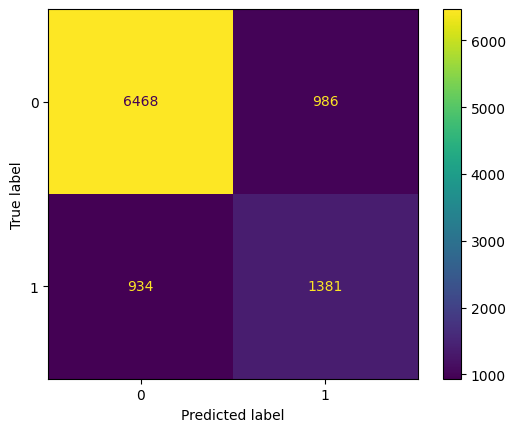

In [24]:
cm = confusion_matrix(y_test, y_pred ,labels=treev2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels = treev2.classes_)
disp.plot()
plt.show()

In [25]:
y_pred = treev2.predict(X_test)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
print(f'Precision: {precision}, Recall: {recall}, Accuracy: {accuracy}')

Precision: 0.8110489139281329, Recall: 0.7247981427919896, Accuracy: 0.8443034087419388


Trial 2 uses the entropy criteriion, which could potentially produce a more interpretable tree but the tradeoff is the computational expense. This limits the tree depth to 5 and adjusts the min_samples_split to 10 and min_samples_leaf to 2 to prevent overfitting. This tests whether limiting depth and adjusting the minimum samples per split and leaf can improve the generalization.

In [26]:
# 3.
treev3 = tune_decision_tree(X_train, y_train, X_test, y_test,
                          criterion_val='gini', splitter_val='best',
                          max_depth_val=3, min_samples_split_val=2,
                          min_samples_leaf_val=5)
treev3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

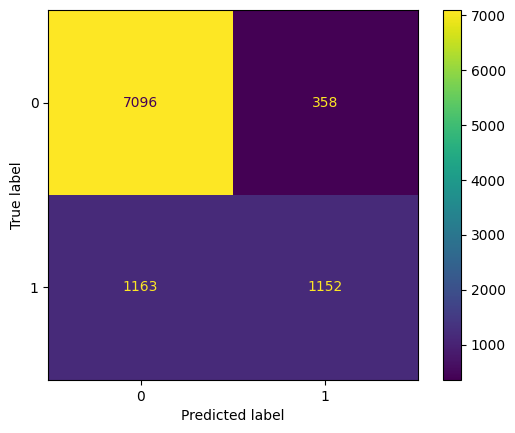

In [27]:
cm = confusion_matrix(y_test, y_pred ,labels=treev3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels = treev3.classes_)
disp.plot()
plt.show()

In [28]:
y_pred = treev3.predict(X_test)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
print(f'Precision: {precision}, Recall: {recall}, Accuracy: {accuracy}')

Precision: 0.8011371027556533, Recall: 0.7095451961374617, Accuracy: 0.8369331559013206


The third trial uses the defaul gini, but limits the tree depth to 3 and increases the minimum samples per leaf to 5. This investigates if a shallower tree with a higher number of sampels per leaf leads to better generalization.

**Conclusion:**
Trial 2 had the best effect on accuracy with an 84.4% accuracy. I think it makes sense that trial 2 has the best accuracy because of the entropy consideration, which resulted in the better performance. While it maintained being the most effective, it also maintained a good trade-off between precision and recall.

# **Part 3: Random Forest and Ensembling Evaluation (40 Points)**

## For Parts 3 and 4, you may pick *your own dataset* or continue with the census data.

## Like above, you will want to reference the documentation as necessary:
### https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


## **Data**
## Use this space to load and call your data for Parts 3 and 4. You are welcome to use your final project data for these sections.

## **Question 1 (10 points):**

## Write a function to take in a feature variable (X) and a target variable (y). Create a train test split for the variables.

## Finally, instantiate, fit, and predict using **both** a single Decision Tree and a Random Forest classifier. Print the accuracy, precision, and recall for both models.

## Call your function and describe your baseline results.


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y_clean_binary, test_size=0.2, random_state=3001)

In [30]:
# Decision Tree
tree = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=5)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}')

Accuracy: 0.8448152318558706, Precision: 0.8115701401246369, Recall: 0.7260269610413994


In [31]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}')

Accuracy: 0.8478861705394616, Precision: 0.7964807807593277, Recall: 0.7640742268925436


The Random Forest model outperforms the Decision Tree in accuracy and recall, making it more effective at correctly identifying positive cases. The Decision Tree model has a slightly higher precision, meaning fewer false positives, but by sacrificing recall, it is missing more actual positives.


## **Question 2 (30 points):**
## This question will ask you to tune Random Forest classifiers and preprocess your data in *any number of ways* to achieve the *best possible results you can*.

## Train one vanilla Decision Forest model and one vanilla Random Forest model and store their accuracies in variables so you can use them as baselines.

## Then, using functions or not, spend some time tuning at least 10 (or more) Random Forest models. Store your accuracies in a list or array and print your maximum accuracy.

# **Go crazy - feel free to implement sampling, dropping features, preprocessing, new parameters, whatever might boost your accuracy.**

# **The top 5 best accuracies in the class will get +15 on their individual lab grade!**

In [35]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_classif

# Feature selection (only keeping top 20 featurs)
selector = SelectKBest(score_func=f_classif, k=20)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Tuning with 10+ Variations and Storing Accuracies
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'warm_start': [True]
}

random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_distributions=param_grid,
    n_iter=10,
    scoring='accuracy',
    cv=3,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train_selected, y_train)

# Finding best random forest model
best_rf = random_search.best_estimator_
rf_best_accuracy = accuracy_score(y_test, best_rf.predict(X_test_selected))
print(rf_best_accuracy)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=20 is greater than n_features=14. All the features will be returned.
  warnings.warn(


0.8566895280990889


# **Part 4: Ensemble Model Interpretation and Reflection (15 Points)**


## **Question 1 (5 points):**
## Create a plot that summarizes the results of your experiments and how they compare to the results of your baseline Decision Tree and Random Forest model.

## You may visualize your results in any type of plot you see fit. Color code your visual in some way so that models that did better than the baseline Random Forest are distinguished from models that did worse.

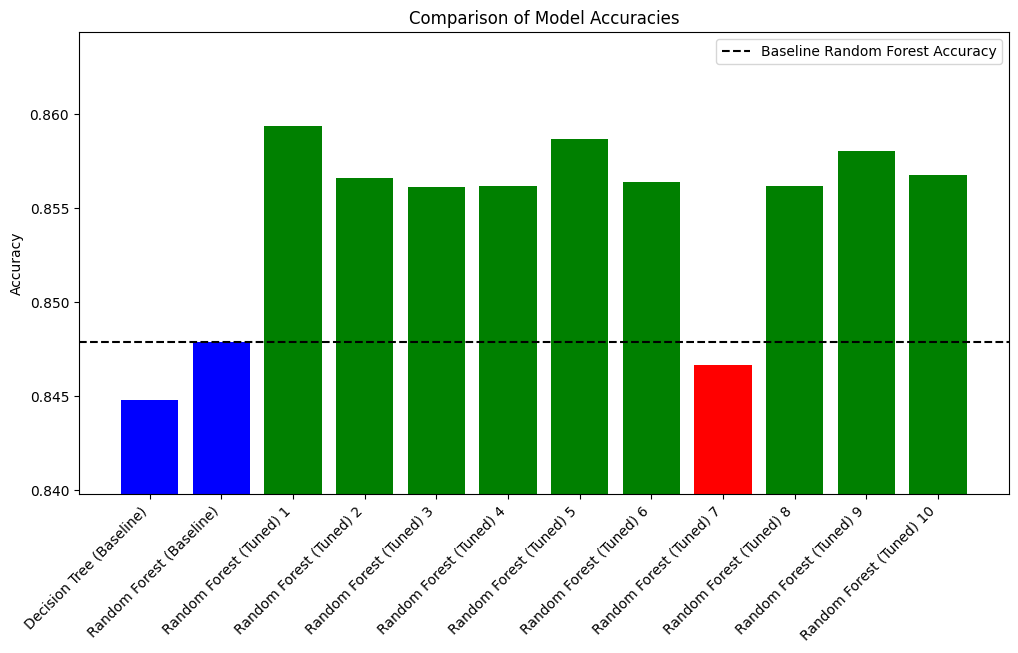

In [43]:
# Baseline Accuracies
baseline_dt = 0.8448152318558706
baseline_rf = 0.8478861705394616

# Tuned Random Forest Accuracy
rf_accuracies = list(random_search.cv_results_['mean_test_score'])

# Model Labels
models = ["Decision Tree (Baseline)", "Random Forest (Baseline)"] + [f"Random Forest (Tuned) {i+1}" for i in range(len(rf_accuracies))]
accuracies = [baseline_dt, baseline_rf] + rf_accuracies

# Color coding: for tuned RF, if better than baseline, Green; Red if worse
colors = ["blue", "blue"] + ["green" if acc > baseline_rf else "red" for acc in rf_accuracies]

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(models, accuracies, color=colors)
plt.axhline(y=baseline_rf, color='black', linestyle='--', label="Baseline Random Forest Accuracy")
plt.ylim(min(accuracies) - 0.005, max(accuracies) + 0.005)  # Zooms in on accuracy range
plt.xticks(rotation=45, ha="right")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.legend()
plt.show()

## **Question 2 (5 points):**
## Write 10 or more sentences on what parameters had the biggest effect or did not seem to effect your results. Did any parameter choices make your results worse than your vanilla model?

**The parameters that seemed to have the biggest effect was max_depth. For instance, when max_depth was set to a lower value, the accuracy tended to be lower, whereas allowing higher depth improved performance significantly. This suggests that deeper trees were able to capture more complex patterns in the data. The number of estimators (n_estimators) also had a notable impact. Models with more estimators performed slightly better than those with less, likely due to having more trees allowed for better averaging and reduced variance. The max_features parameter had a more nuanced impact, suggesting that using a subset of features helped the model generalize better. The choice of using min_samples_split and min_samples_leaf had some effect, but not as drastic as max_depth. Setting them to 5 and 2, respectively, seemed help prevent overfitting, but in some cases, the accuracy dropped slightly. Bootstrap did no tmake a huge difference in accuracy, concluding that bagging was not as critical for performance improvement in this case. Only one of the tuned models led to worse results than the baseline Random Forest, seem in red in the graph above. This was likely due to an over-restrictive depth setting.**

## **Question 3 (5 points):**
## Write 10 or more sentences reflecting on the tuning process.

## What kind of approach did you take? Was it random combinations or more structured? Did you change your approach after seeing your initial results?

## What kind of strategies in preprocessing and picking parameters (ie: brute forcing parameters, testing various values in a range) do you think would get some of the best scores in the class?

**I decided to start with a randomized search approach, which allowed for a diverse set of parameter combinations to be tested. This was useful for exploring different settings without manually plugging each combination in. I think that this was not the most effective way in finding the best tuning combination for accuracy. One difficulty I faces was that almost all the models had minimal improvements over the baseline model despite tuning. This might indicate that additional feature engineering might be needed. If I were to do it again, I would pursue a structured grid search since it would possibly be more efficient after identifying parameter ranges. This would allow me to systematically test specific combinations while focusing on the most promising parameters. Given the results, I would've pursued a fine-tuned approachh focusing on just the important parameters, like max_depth, n_estimators, and max_features, that would likely yield the best accuracy scores. A way that could've optimized the models further would be iterative pruning to remove the low-impact features or adjusting the parameters step-by-step rather than all at once. Overall, the tuning process has taught me that good processing, feature selection, and an interative strategy is critical in getting the most accurate results. Moving forward, I would focus on testing a narrower, more meaningful range of paramters to reduce the risk of overfitting.**

### Honor Pledge

On my honor as a student, I have neither given nor received unauthorized aid on this assignment.